In [7]:
#Import Necessary Liberaries
import pandas as pd
import numpy as np
import plotly.express as px

In [8]:
# To Show All Column
pd.set_option('display.max_columns', None)

In [9]:
# Data Loading

df = pd.read_csv("SuperMarket Analysis.csv")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['invoice id', 'branch', 'city', 'customer type', 'gender',
       'product line', 'unit price', 'quantity', 'tax 5%', 'sales', 'date',
       'time', 'payment', 'cogs', 'gross margin percentage', 'gross income',
       'rating'],
      dtype='object')

# Data Exploration

In [11]:
# check data types
df.info('SuperMarket Analysis.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product line             1000 non-null   object 
 6   unit price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax 5%                   1000 non-null   float64
 9   sales                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
# summry statistics

# Check Summary Statistics For Numerical Columns
df.describe(include= "number").round(2)

,unit price,quantity,tax 5%,sales,cogs,gross margin percentage,gross income,rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [13]:
# Check Summary Statistics For Categorical Columns
df.describe(include= "O").round(2)

,invoice id,branch,city,customer type,gender,product line,date,time,payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,Alex,Yangon,Member,Female,Fashion accessories,2/7/2019,7:48:00 PM,Ewallet
freq,1,340,340,565,571,178,20,7,345


In [14]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

In [15]:
# Check Missing Value
df.isna().mean() * 100

invoice id                 0.0
branch                     0.0
city                       0.0
customer type              0.0
gender                     0.0
product line               0.0
unit price                 0.0
quantity                   0.0
tax 5%                     0.0
sales                      0.0
date                       0.0
time                       0.0
payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
rating                     0.0
dtype: float64

# Data Cleaning

In [16]:
# In Depth Check For Categorical Columns

cat_col = df.select_dtypes(include= "O").drop(["invoice id", "date", "time"], axis = 1).columns
cat_col

Index(['branch', 'city', 'customer type', 'gender', 'product line', 'payment'], dtype='object')

In [17]:
for col in cat_col:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print("-" * 100)

branch
3
['Alex' 'Giza' 'Cairo']
----------------------------------------------------------------------------------------------------
city
3
['Yangon' 'Naypyitaw' 'Mandalay']
----------------------------------------------------------------------------------------------------
customer type
2
['Member' 'Normal']
----------------------------------------------------------------------------------------------------
gender
2
['Female' 'Male']
----------------------------------------------------------------------------------------------------
product line
6
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
----------------------------------------------------------------------------------------------------
payment
3
['Ewallet' 'Cash' 'Credit card']
----------------------------------------------------------------------------------------------------


In [18]:
# In Depth Check For Numerical Columns

num_col = df.select_dtypes(include= "number").columns
num_col


Index(['unit price', 'quantity', 'tax 5%', 'sales', 'cogs',
       'gross margin percentage', 'gross income', 'rating'],
      dtype='object')

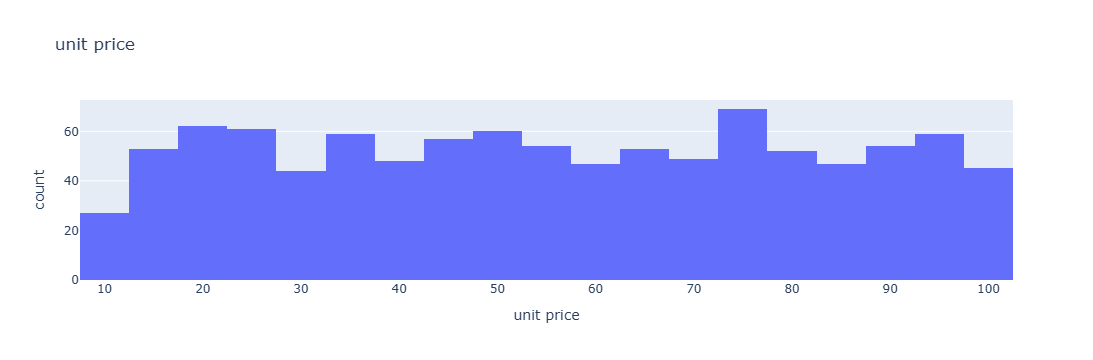

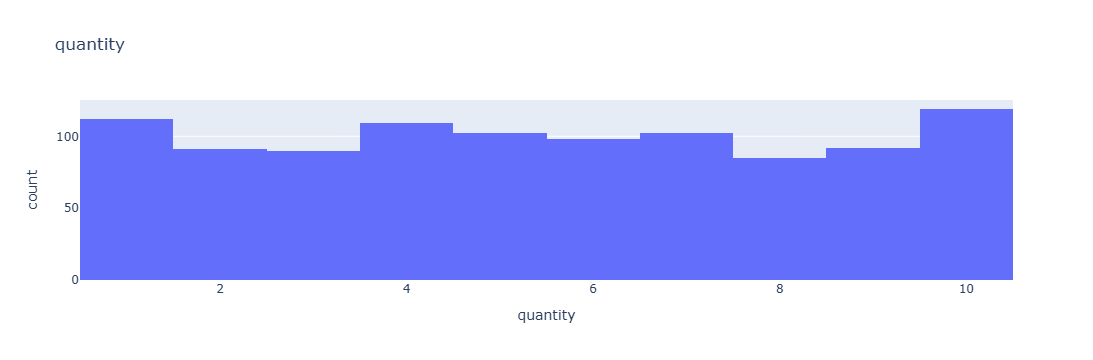

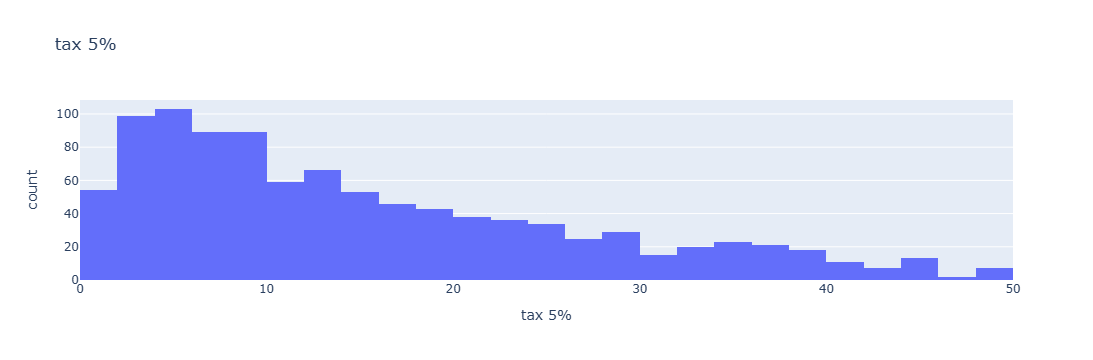

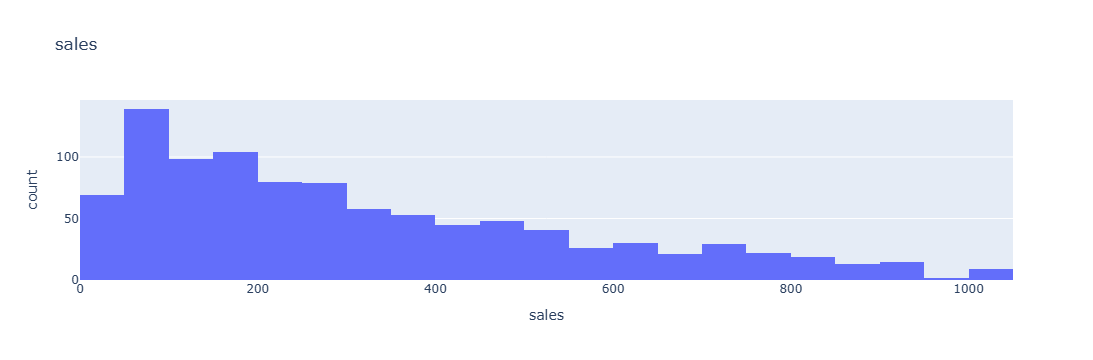

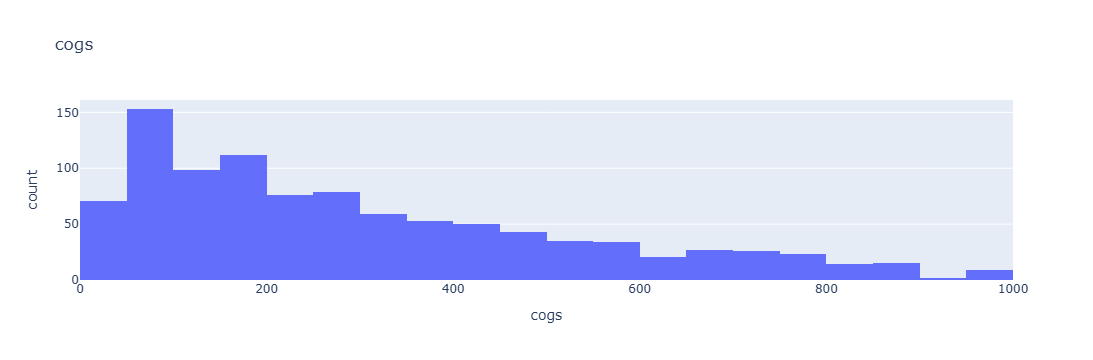

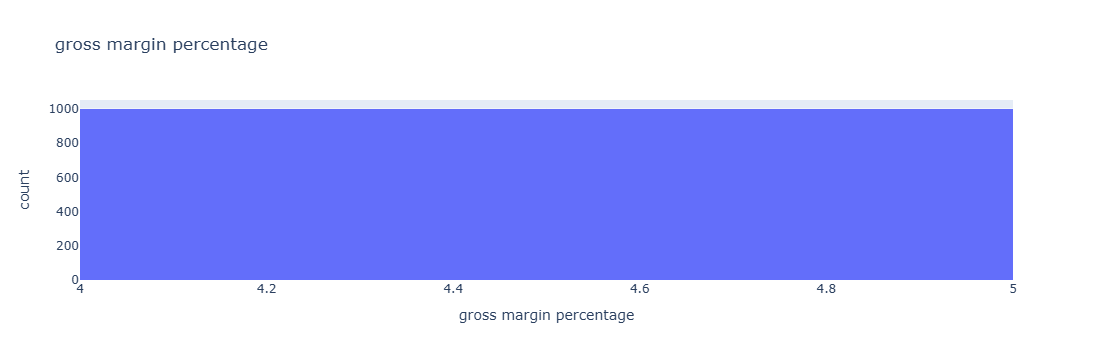

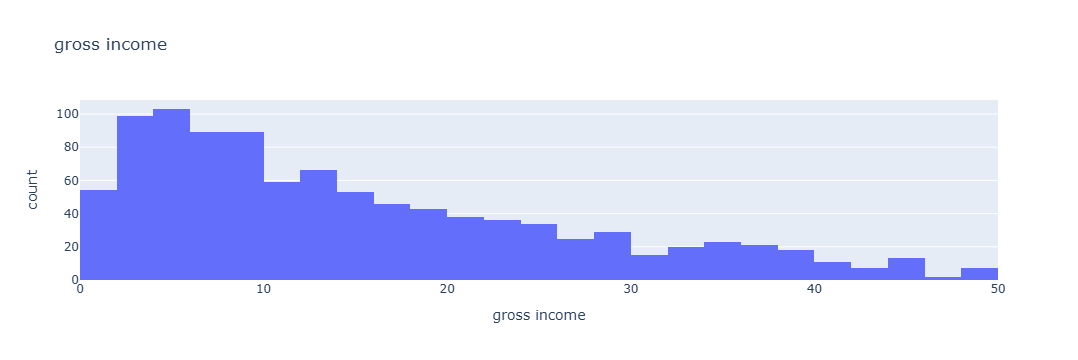

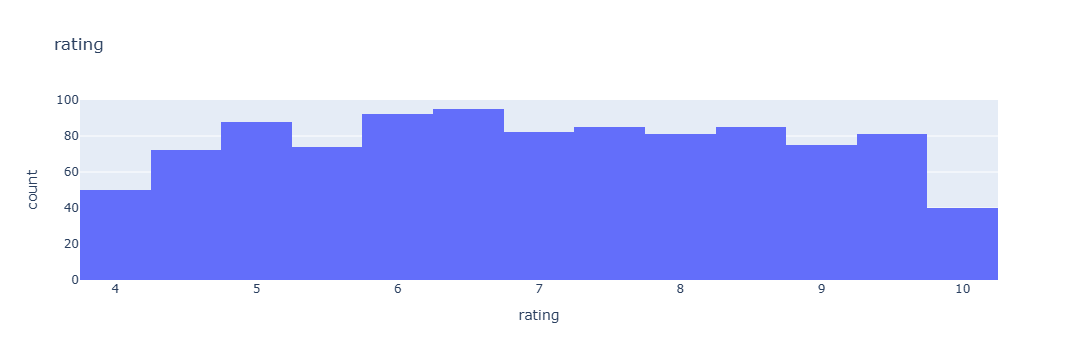

In [19]:
for col in num_col:
    px.histogram(df, x= col, title= col).show()

# Feature Engineering

In [20]:
# change Date type
df.date = pd.to_datetime(df.date)
df.date

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: date, Length: 1000, dtype: datetime64[ns]

In [65]:
df.time = pd.to_datetime(df.time)
df.time

0     2025-09-29 13:08:00
1     2025-09-29 10:29:00
2     2025-09-29 13:23:00
3     2025-09-29 20:33:00
4     2025-09-29 10:37:00
              ...        
995   2025-09-29 13:46:00
996   2025-09-29 17:16:00
997   2025-09-29 13:22:00
998   2025-09-29 15:33:00
999   2025-09-29 13:28:00
Name: time, Length: 1000, dtype: datetime64[ns]

In [64]:
# Extract Month
df['month'] = df.date.dt.strftime('%m')
df['month']

0      01
1      03
2      03
3      01
4      02
       ..
995    01
996    03
997    02
998    02
999    02
Name: month, Length: 1000, dtype: object

In [70]:
# Extract Day
df['day'] = df.date.dt.strftime('%w')
df['day']

0      6
1      5
2      0
3      0
4      5
      ..
995    2
996    6
997    6
998    5
999    1
Name: day, Length: 1000, dtype: object

In [71]:
df.head(5)

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,sales,date,time,payment,cogs,gross margin percentage,gross income,rating,month,day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-09-29 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,01,6
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-09-29 10:29:00,Cash,76.40,4.761905,3.8200,9.6,03,5
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-09-29 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,03,0
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-09-29 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,01,0
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-09-29 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,02,5


In [25]:
df.to_csv('cleaned_Supermarket.csv', index = False)

# Deployment (streamlit)

In [73]:
%%writefile market.py


import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px

# set page layout
st.set_page_config(
    layout='wide',
    page_title="Supermarket Sales Dashboard",
    page_icon="🛒")
# add title
st.markdown(
    """<h1 style="color:#f39c12; text-align:center;"> 🛒 Supermarket Sales Dashboard </h1>""",
     unsafe_allow_html=True)
# add image 
st.image('supermarket.png')

# load dataset
df = pd.read_csv('cleaned_Supermarket.csv', index_col = 0)
st.dataframe(df.head(5))

# create sidebar

page = (st.sidebar.radio('#_Pages_:-', ['Dataset Overview', 'Uni-Variate Analysis', 'Bi-Variate Analysis', 'Multi-Variate Analysis']))

if page == 'Dataset Overview':

    """  
        📄 Dataset Overview:
        
    This dataset records transactional data from a supermarket, capturing sales, customer demographics, product details, and financial metrics.

        🔢 Size & Structure
    Rows: ~1,000 transactions
    Columns: 17 features including IDs, categories, prices, quantities, dates, times, and ratings

        📌 Key Columns & Descriptions
    Column	Description
    * Invoice ID	: Unique identifier for each transaction
    * Branch, City	: Store branch and its corresponding city
    * Customer type	: Indicates if a customer is a "Member" or "Normal"
    * Gender	: Male or Female
    * Product line	: One of 6 product categories (e.g., Food, Fashion)
    * Unit price, Quantity	: Price per item and number of items bought
    * Sales	: Total amount paid including tax
    * Tax 5%, cogs	: Calculated fields based on sales
    * gross income	: Profit from the transaction
    * Payment	: Payment method (Cash, Credit card, Ewallet)
    * Date, Time	: Date and time of purchase
    * Rating	: Customer feedback (scale 1–10)

        📊 General Insights
        🏬 Branches & Cities
    There are 3 branches in 3 cities: Yangon, Naypyitaw, and Mandalay

    Naypyitaw (Giza branch) shows the highest total and average sales

        👥 Customer Demographics
    Balanced distribution across Gender and Customer Type

    Both genders and customer types contribute evenly to revenue

        🛒 Product Line Analysis
    Six distinct product lines

    Product lines vary significantly in average sales and ratings

        💵 Sales & Revenue
    Sales = Unit Price × Quantity + 5% Tax

    Most transactions fall within moderate price and quantity ranges

    Gross income is directly tied to the size of each transaction

        ⏰ Time & Date
    Sales happen throughout the day; peak times can be explored

    Transactions cover multiple months — useful for trend analysis

        🔀 Strengths for Analysis
    Good variety of categorical and numerical variables

    Perfect for univariate, bivariate, and multivariate analysis

    Ideal for use cases such as:

    * Sales forecasting

    * Customer segmentation

    * Product line profitability

    * Branch performance comparisons
    """
    # About Me Section
    st.markdown("---")
    st.markdown("### 👨‍💻 About the Developer")
    st.markdown("""
                - **Name:** Ahmed Saif 
                - **GitHub:** [github.com/Saif900121](https://github.com/Saif900121)  
                - **LinkedIn:** [linkedin.com/in/aahmed-saif-1bb820192](https://www.linkedin.com/in/ahmed-saif-1bb820192/)  
                - **Email:** [drahmed.saif90@gmail.com](mailto:drahmed.saif90@gmail.com)
                """)
elif page == 'Uni-Variate Analysis':

    tab_1, tab_2 = st.tabs(['Numerical Univariat Analysis', 'Categorical Univariate Analysis'])

    col_num = tab_1.selectbox('Select Numerical Column', df.select_dtypes(include= 'number').columns)
    col_cat = tab_2.selectbox('Select Categorical Column', df.select_dtypes(include= 'object').columns)
    chart_num = tab_1.selectbox('Select Chart', ['Histogram', 'Box'])
    chart_cat = tab_2.selectbox('Select Chart', ['Histogram', 'Pie'])

    if chart_num == 'Histogram':
        tab_1.plotly_chart(px.histogram(data_frame= df, x= col_num, title= col_num))

    elif chart_num == 'Box':
        tab_1.plotly_chart(px.box(data_frame= df, y= col_num, title= col_num))

    if chart_cat == 'Histogram':
        tab_2.plotly_chart(px.histogram(data_frame= df, x= col_cat, title= col_cat))

    elif chart_cat == 'Pie':
        tab_2.plotly_chart(px.pie(data_frame= df, names= col_cat, title= col_cat))
    
    start_date = st.sidebar.date_input('Start Date', value= df.date.min(), min_value= df.date.min(), max_value= df.date.max())
    end_date = st.sidebar.date_input('End Date', value= df.date.max(), min_value= df.date.min(), max_value= df.date.max())
    city = st.sidebar.multiselect('City', df.city.unique())
    top_n = st.sidebar.slider('Top N', min_value = 1, max_value = 10)

    df_filtered = df[(df.date >= str(start_date)) & (df.date <= str(end_date))] 
    df_filtered = df_filtered[(df_filtered.city.isin(city))]
    
    st.dataframe(df_filtered)
    product_count = df_filtered.product_line.value_counts().head(top_n).reset_index()

    st.markdown(
    f"""<h1 style="color:#f39c12; text-align:center;"> Top {top_n} Popular Products </h1>""",
     unsafe_allow_html=True)
    st.plotly_chart(px.bar(product_count, x = 'product line', y = 'count'))

elif page == 'Bi-Variate Analysis':
    st.header('Does customer type (Member vs. Normal) affect total sales or gross income?')
    sales_per_type = df.groupby('customer type')['sales'].sum().reset_index()
    st.plotly_chart(px.bar(data_frame= sales_per_type, x = 'customer type', y= 'sales', text_auto= True,
       labels= {'sales': 'Total sales', }))
    income_per_type = df.groupby('customer type')['gross income'].sum().reset_index()
    st.plotly_chart(px.bar(data_frame= income_per_type, x = 'customer type', y= 'gross income', text_auto= True,
       labels= {'gross income': 'Total gross income', }))
    
    st.header('Is there a difference in sales between male and female customers?')
    sales_per_gender = df.groupby('gender')['sales'].sum().reset_index()
    st.plotly_chart(px.bar(data_frame= sales_per_gender, x = 'gender', y= 'sales', text_auto= True,
       labels= {'sales': 'Total sales', 'gender':'Gender'}))
    st.header('Which product line has the highest Total gross income?')
    total_income_per_product = df.groupby('product line')['gross income'].sum().sort_values(ascending=False).reset_index()
    st.plotly_chart(px.bar(data_frame= total_income_per_product, x= 'product line', y= 'gross income', text_auto= True))

elif page == 'Multi-Variate Analysis':
    st.header('What combination of Month, payment method, and product line leads to the total gross income?')
    income_per_month = df.groupby(['month', 'payment', 'product line'])['gross income'].sum().reset_index()
    st.plotly_chart(px.bar(data_frame= income_per_month, x= 'month', y= 'gross income', color= 'product line',facet_col= 'payment', 
       barmode= 'group'))

    st.header('What combination of city, payment method, and product line leads to the total gross income?')
    income_per_line = df.groupby(['city', 'payment', 'product line'])['gross income'].sum().reset_index()
    st.plotly_chart(px.bar(data_frame= income_per_line, x= 'product line', y= 'gross income', color= 'payment',facet_col= 'city', 
       barmode= 'group'))

Overwriting market.py


In [72]:
! streamlit run market.py

^C


# Preprocessing Phase

## Handling Outlier

In [7]:
#!pip install datasist

In [23]:
from datasist.structdata import detect_outliers

detect_outliers(data= df, n= 0, features= ["sales"])

[166, 167, 350, 357, 422, 557, 699, 792, 996]

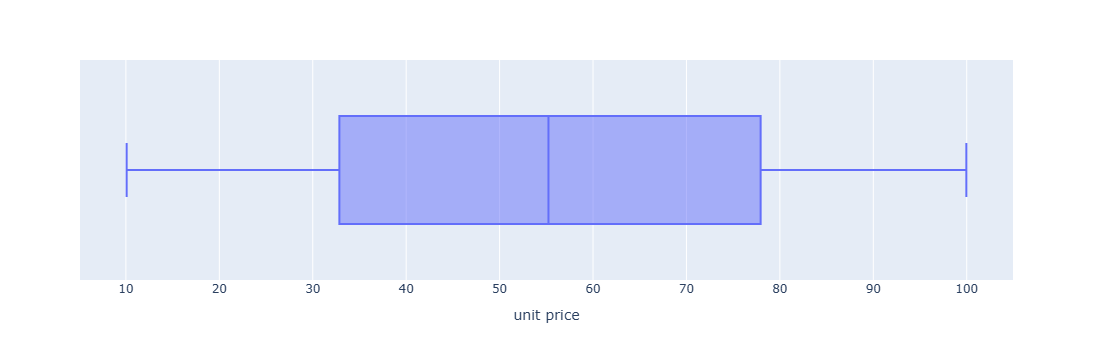

In [27]:
px.box(data_frame= df, x= 'unit price')

In [74]:
df.describe(include= "number")

,unit price,quantity,tax 5%,sales,cogs,gross margin percentage,gross income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


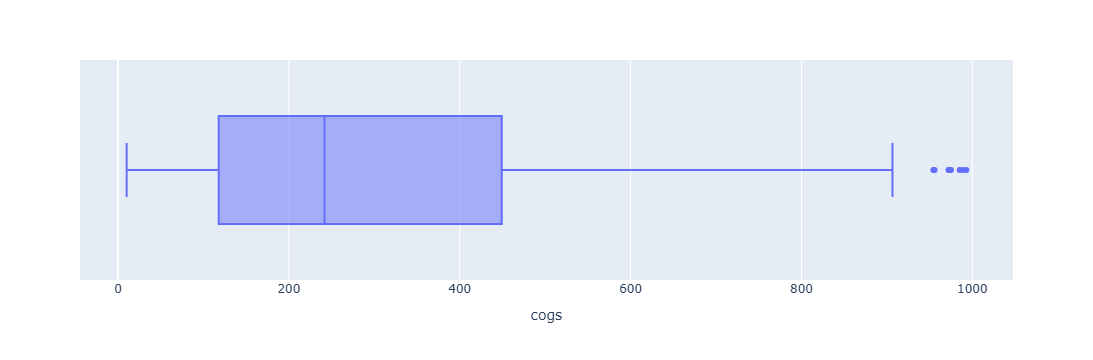

In [24]:
px.box(data_frame= df, x= 'cogs')

In [36]:
from datasist.structdata import detect_outliers
detect_outliers(data= df, n= 0, features= ["cogs"])

[166, 167, 350, 357, 422, 557, 699, 792, 996]

## Dealing with Categorical

### Nominal

In [75]:
df.select_dtypes(include = 'O')

,invoice id,branch,city,customer type,gender,product line,payment,month,day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,Ewallet,01,6
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,Cash,03,5
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,Credit card,03,0
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,Ewallet,01,0
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,Ewallet,02,5
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,Ewallet,01,2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,Ewallet,03,6
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,Cash,02,6
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,Cash,02,5


In [27]:
df[cat_col]

,branch,city,customer type,gender,product line,payment
0,Alex,Yangon,Member,Female,Health and beauty,Ewallet
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,Alex,Yangon,Normal,Female,Home and lifestyle,Credit card
3,Alex,Yangon,Member,Female,Health and beauty,Ewallet
4,Alex,Yangon,Member,Female,Sports and travel,Ewallet
...,...,...,...,...,...,...
995,Giza,Naypyitaw,Normal,Male,Health and beauty,Ewallet
996,Cairo,Mandalay,Normal,Female,Home and lifestyle,Ewallet
997,Alex,Yangon,Member,Male,Food and beverages,Cash
998,Alex,Yangon,Normal,Male,Home and lifestyle,Cash


In [76]:
for col in cat_col:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print("-" * 100)

branch
3
['Alex' 'Giza' 'Cairo']
----------------------------------------------------------------------------------------------------
city
3
['Yangon' 'Naypyitaw' 'Mandalay']
----------------------------------------------------------------------------------------------------
customer type
2
['Member' 'Normal']
----------------------------------------------------------------------------------------------------
gender
2
['Female' 'Male']
----------------------------------------------------------------------------------------------------
product line
6
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
----------------------------------------------------------------------------------------------------
payment
3
['Ewallet' 'Cash' 'Credit card']
----------------------------------------------------------------------------------------------------


In [86]:
df.gender

0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
995      Male
996    Female
997      Male
998      Male
999    Female
Name: gender, Length: 1000, dtype: object

In [87]:
pd.get_dummies(df.gender)

,Female,Male
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
995,False,True
996,True,False
997,False,True
998,False,True


In [88]:
df.payment

0          Ewallet
1             Cash
2      Credit card
3          Ewallet
4          Ewallet
          ...     
995        Ewallet
996        Ewallet
997           Cash
998           Cash
999           Cash
Name: payment, Length: 1000, dtype: object

In [89]:
pd.get_dummies(df.payment, drop_first= True)

,Credit card,Ewallet
0,False,True
1,False,False
2,True,False
3,False,True
4,False,True
...,...,...
995,False,True
996,False,True
997,False,False
998,False,False


In [90]:
# Using sklearn

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output= False, drop = 'first')

ohe_arr = ohe.fit_transform(df[cat_col])
ohe_arr

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
ohe_df = pd.DataFrame(ohe_arr, columns= ohe.get_feature_names_out())
ohe_df

,branch_Cairo,branch_Giza,city_Naypyitaw,city_Yangon,customer type_Normal,gender_Male,product line_Fashion accessories,product line_Food and beverages,product line_Health and beauty,product line_Home and lifestyle,product line_Sports and travel,payment_Credit card,payment_Ewallet
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [92]:
new_df = pd.concat([df, ohe_df], axis= 1).drop(cat_col, axis = 1).head()
new_df

,invoice id,unit price,quantity,tax 5%,sales,date,time,cogs,gross margin percentage,gross income,rating,month,day,branch_Cairo,branch_Giza,city_Naypyitaw,city_Yangon,customer type_Normal,gender_Male,product line_Fashion accessories,product line_Food and beverages,product line_Health and beauty,product line_Home and lifestyle,product line_Sports and travel,payment_Credit card,payment_Ewallet
0,750-67-8428,74.69,7,26.1415,548.9715,2019-01-05,2025-09-29 13:08:00,522.83,4.761905,26.1415,9.1,01,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,226-31-3081,15.28,5,3.8200,80.2200,2019-03-08,2025-09-29 10:29:00,76.40,4.761905,3.8200,9.6,03,5,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,631-41-3108,46.33,7,16.2155,340.5255,2019-03-03,2025-09-29 13:23:00,324.31,4.761905,16.2155,7.4,03,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,123-19-1176,58.22,8,23.2880,489.0480,2019-01-27,2025-09-29 20:33:00,465.76,4.761905,23.2880,8.4,01,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,373-73-7910,86.31,7,30.2085,634.3785,2019-02-08,2025-09-29 10:37:00,604.17,4.761905,30.2085,5.3,02,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [93]:
df.head()

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,sales,date,time,payment,cogs,gross margin percentage,gross income,rating,month,day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-09-29 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,01,6
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-09-29 10:29:00,Cash,76.40,4.761905,3.8200,9.6,03,5
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-09-29 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,03,0
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-09-29 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,01,0
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-09-29 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,02,5


### Ordinal

In [49]:
# No ordinal columns in DF

# Feature Scaling

In [94]:
from sklearn.preprocessing import MinMaxScaler

mmc = MinMaxScaler()

mmc.fit_transform(df[['sales']])

array([[0.52161615],
       [0.06738704],
       [0.31962801],
       [0.46354914],
       [0.60437716],
       [0.59782465],
       [0.40990812],
       [0.73810323],
       [0.06343925],
       [0.15704649],
       [0.04858419],
       [0.09347497],
       [0.2285034 ],
       [0.42909761],
       [0.71592239],
       [0.56179604],
       [0.48059176],
       [0.43292329],
       [0.15652758],
       [0.07166041],
       [0.42736791],
       [0.25820335],
       [0.05721234],
       [0.16547114],
       [0.26018742],
       [0.41772229],
       [0.02375792],
       [0.16805551],
       [0.43917056],
       [0.21757578],
       [0.46852457],
       [0.70455725],
       [0.6716014 ],
       [0.18618683],
       [0.39427978],
       [0.05896238],
       [0.30822217],
       [0.54714447],
       [0.43668793],
       [0.23482189],
       [0.07788733],
       [0.10383281],
       [0.41161747],
       [0.79304661],
       [0.02092936],
       [0.37205824],
       [0.50877568],
       [0.172

In [95]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit_transform(df[['cogs']])

array([[ 9.19606849e-01],
       [-9.87729558e-01],
       [ 7.14460541e-02],
       [ 6.75779846e-01],
       [ 1.26712548e+00],
       [ 1.23961110e+00],
       [ 4.50537870e-01],
       [ 1.82864963e+00],
       [-1.00430655e+00],
       [-6.11243919e-01],
       [-1.06668388e+00],
       [-8.78184713e-01],
       [-3.11191870e-01],
       [ 5.31115709e-01],
       [ 1.73551087e+00],
       [ 1.08832471e+00],
       [ 7.47342879e-01],
       [ 5.47180008e-01],
       [-6.13422853e-01],
       [-9.69785395e-01],
       [ 5.23852595e-01],
       [-1.86479934e-01],
       [-1.03045376e+00],
       [-5.75868282e-01],
       [-1.78148715e-01],
       [ 4.83350055e-01],
       [-1.17093092e+00],
       [-5.65016335e-01],
       [ 5.73412666e-01],
       [-3.57077660e-01],
       [ 6.96671980e-01],
       [ 1.68778794e+00],
       [ 1.54940426e+00],
       [-4.88881813e-01],
       [ 3.84913501e-01],
       [-1.02310520e+00],
       [ 2.35522273e-02],
       [ 1.02680186e+00],
       [ 5.6

In [96]:
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()

rc.fit_transform(df[['cogs']])

array([[ 8.50676816e-01],
       [-5.00472901e-01],
       [ 2.49842997e-01],
       [ 6.77950712e-01],
       [ 1.09685767e+00],
       [ 1.07736659e+00],
       [ 5.18390170e-01],
       [ 1.49463920e+00],
       [-5.12215976e-01],
       [-2.33771933e-01],
       [-5.56403835e-01],
       [-4.22871757e-01],
       [-2.12162254e-02],
       [ 5.75471198e-01],
       [ 1.42866006e+00],
       [ 9.70195894e-01],
       [ 7.28645688e-01],
       [ 5.86851085e-01],
       [-2.35315482e-01],
       [-4.87761325e-01],
       [ 5.70326037e-01],
       [ 6.71292268e-02],
       [-5.30738558e-01],
       [-2.08711969e-01],
       [ 7.30310299e-02],
       [ 5.41634194e-01],
       [-6.30252037e-01],
       [-2.01024492e-01],
       [ 6.05434199e-01],
       [-5.37215408e-02],
       [ 6.92750619e-01],
       [ 1.39485333e+00],
       [ 1.29682286e+00],
       [-1.47091092e-01],
       [ 4.71902121e-01],
       [-5.25532865e-01],
       [ 2.15915196e-01],
       [ 9.26613349e-01],
       [ 5.9

In [97]:
new_df.describe(include = 'number').columns

Index(['unit price', 'quantity', 'tax 5%', 'sales', 'cogs',
       'gross margin percentage', 'gross income', 'rating', 'branch_Cairo',
       'branch_Giza', 'city_Naypyitaw', 'city_Yangon', 'customer type_Normal',
       'gender_Male', 'product line_Fashion accessories',
       'product line_Food and beverages', 'product line_Health and beauty',
       'product line_Home and lifestyle', 'product line_Sports and travel',
       'payment_Credit card', 'payment_Ewallet'],
      dtype='object')

In [98]:
new_df_num_col = ['unit price', 'quantity', 'tax 5%', 'sales', 'cogs',
       'gross margin percentage', 'gross income', 'rating']
print(new_df_num_col)

['unit price', 'quantity', 'tax 5%', 'sales', 'cogs', 'gross margin percentage', 'gross income', 'rating']


In [99]:
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()

new_df[new_df_num_col] = rc.fit_transform(new_df[new_df_num_col])
new_df[new_df_num_col]

,unit price,quantity,tax 5%,sales,cogs,gross margin percentage,gross income,rating
0,0.580748,0.0,0.287477,0.287477,0.287477,0.0,0.287477,0.411765
1,-1.514104,-2.0,-1.961314,-1.961314,-1.961314,0.0,-1.961314,0.705882
2,-0.419252,0.0,-0.712523,-0.712523,-0.712523,0.0,-0.712523,-0.588235
3,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.990480,0.0,0.697209,0.697209,0.697209,0.0,0.697209,-1.823529


In [100]:
new_df.head()

,invoice id,unit price,quantity,tax 5%,sales,date,time,cogs,gross margin percentage,gross income,rating,month,day,branch_Cairo,branch_Giza,city_Naypyitaw,city_Yangon,customer type_Normal,gender_Male,product line_Fashion accessories,product line_Food and beverages,product line_Health and beauty,product line_Home and lifestyle,product line_Sports and travel,payment_Credit card,payment_Ewallet
0,750-67-8428,0.580748,0.0,0.287477,0.287477,2019-01-05,2025-09-29 13:08:00,0.287477,0.0,0.287477,0.411765,01,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,226-31-3081,-1.514104,-2.0,-1.961314,-1.961314,2019-03-08,2025-09-29 10:29:00,-1.961314,0.0,-1.961314,0.705882,03,5,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,631-41-3108,-0.419252,0.0,-0.712523,-0.712523,2019-03-03,2025-09-29 13:23:00,-0.712523,0.0,-0.712523,-0.588235,03,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,123-19-1176,0.000000,1.0,0.000000,0.000000,2019-01-27,2025-09-29 20:33:00,0.000000,0.0,0.000000,0.000000,01,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,373-73-7910,0.990480,0.0,0.697209,0.697209,2019-02-08,2025-09-29 10:37:00,0.697209,0.0,0.697209,-1.823529,02,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


####################

In [102]:
df.head()

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,sales,date,time,payment,cogs,gross margin percentage,gross income,rating,month,day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-09-29 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,01,6
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-09-29 10:29:00,Cash,76.40,4.761905,3.8200,9.6,03,5
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-09-29 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,03,0
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-09-29 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,01,0
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-09-29 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,02,5


### 1- Split Data into Input features and Target feature

In [103]:
x = df.drop('sales', axis= 1)

y = df['sales']

In [104]:
y

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: sales, Length: 1000, dtype: float64

### 2- Split Data into Train & Test

In [2]:
#!pip install scikit-learn

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [106]:
y_train.value_counts(normalize= True).round(4) * 100

sales
87.2340     0.25
217.6335    0.25
175.9170    0.25
189.0945    0.25
263.9700    0.25
            ... 
763.4655    0.12
85.5855     0.12
479.9025    0.12
833.5950    0.12
218.0115    0.12
Name: proportion, Length: 793, dtype: float64

In [107]:
y_test.value_counts(normalize= True).round(4) * 100

sales
216.8460    1.0
523.9710    0.5
836.3040    0.5
20.1075     0.5
131.9220    0.5
           ... 
118.2510    0.5
391.4190    0.5
127.2600    0.5
293.1390    0.5
822.2550    0.5
Name: proportion, Length: 199, dtype: float64

In [108]:
x_train

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,date,time,payment,cogs,gross margin percentage,gross income,rating,month,day
29,848-62-7243,Alex,Yangon,Member,Female,Health and beauty,24.89,9,11.2005,2019-03-15,2025-09-29 15:36:00,Cash,224.01,4.761905,11.2005,7.4,03,5
535,583-41-4548,Giza,Naypyitaw,Normal,Male,Home and lifestyle,16.67,7,5.8345,2019-02-07,2025-09-29 11:36:00,Ewallet,116.69,4.761905,5.8345,7.4,02,4
695,800-09-8606,Alex,Yangon,Member,Female,Home and lifestyle,87.37,5,21.8425,2019-01-29,2025-09-29 19:45:00,Cash,436.85,4.761905,21.8425,6.6,01,2
557,283-26-5248,Giza,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.2600,2019-01-30,2025-09-29 20:23:00,Ewallet,985.20,4.761905,49.2600,4.5,01,3
836,288-62-1085,Alex,Yangon,Member,Male,Fashion accessories,38.54,5,9.6350,2019-01-09,2025-09-29 13:34:00,Ewallet,192.70,4.761905,9.6350,5.6,01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,628-34-3388,Giza,Naypyitaw,Member,Female,Fashion accessories,27.38,6,8.2140,2019-01-05,2025-09-29 20:54:00,Credit card,164.28,4.761905,8.2140,7.9,01,6
270,783-09-1637,Cairo,Mandalay,Normal,Female,Sports and travel,67.43,5,16.8575,2019-03-06,2025-09-29 18:13:00,Ewallet,337.15,4.761905,16.8575,6.3,03,3
860,848-95-6252,Giza,Naypyitaw,Member,Female,Home and lifestyle,86.27,1,4.3135,2019-02-20,2025-09-29 13:24:00,Ewallet,86.27,4.761905,4.3135,7.0,02,3
435,751-69-0068,Giza,Naypyitaw,Normal,Male,Sports and travel,99.24,9,44.6580,2019-03-19,2025-09-29 19:09:00,Ewallet,893.16,4.761905,44.6580,9.0,03,2


In [109]:
x_test

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,date,time,payment,cogs,gross margin percentage,gross income,rating,month,day
521,451-28-5717,Giza,Naypyitaw,Member,Female,Home and lifestyle,83.17,6,24.9510,2019-03-20,2025-09-29 11:23:00,Cash,499.02,4.761905,24.9510,7.3,03,3
737,137-63-5492,Giza,Naypyitaw,Normal,Male,Electronic accessories,58.76,10,29.3800,2019-01-29,2025-09-29 14:26:00,Ewallet,587.60,4.761905,29.3800,9.0,01,2
740,733-29-1227,Giza,Naypyitaw,Normal,Male,Home and lifestyle,55.61,7,19.4635,2019-03-23,2025-09-29 12:41:00,Cash,389.27,4.761905,19.4635,8.5,03,6
660,322-02-2271,Cairo,Mandalay,Normal,Female,Sports and travel,42.97,3,6.4455,2019-02-03,2025-09-29 11:46:00,Cash,128.91,4.761905,6.4455,9.3,02,0
411,569-71-4390,Cairo,Mandalay,Normal,Male,Sports and travel,21.87,2,2.1870,2019-01-25,2025-09-29 14:29:00,Ewallet,43.74,4.761905,2.1870,6.9,01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,256-08-8343,Alex,Yangon,Normal,Female,Home and lifestyle,56.53,4,11.3060,2019-03-04,2025-09-29 19:48:00,Ewallet,226.12,4.761905,11.3060,5.5,03,1
332,566-71-1091,Alex,Yangon,Normal,Male,Fashion accessories,77.02,5,19.2550,2019-02-03,2025-09-29 15:59:00,Cash,385.10,4.761905,19.2550,5.5,02,0
208,573-58-9734,Cairo,Mandalay,Normal,Female,Fashion accessories,30.37,3,4.5555,2019-03-28,2025-09-29 13:41:00,Ewallet,91.11,4.761905,4.5555,5.1,03,4
613,284-54-4231,Giza,Naypyitaw,Member,Male,Sports and travel,80.93,1,4.0465,2019-01-19,2025-09-29 16:08:00,Credit card,80.93,4.761905,4.0465,9.0,01,6


### 3- Handle Numerical Data

##### 1 -  Impute Missing

In [110]:
num_cols = x_train.select_dtypes(include= 'number').columns
num_cols

Index(['unit price', 'quantity', 'tax 5%', 'cogs', 'gross margin percentage',
       'gross income', 'rating'],
      dtype='object')

In [111]:
x_train.isna().mean().round(4) * 100

invoice id                 0.0
branch                     0.0
city                       0.0
customer type              0.0
gender                     0.0
product line               0.0
unit price                 0.0
quantity                   0.0
tax 5%                     0.0
date                       0.0
time                       0.0
payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
rating                     0.0
month                      0.0
day                        0.0
dtype: float64

In [112]:
x_test.isna().sum()

invoice id                 0
branch                     0
city                       0
customer type              0
gender                     0
product line               0
unit price                 0
quantity                   0
tax 5%                     0
date                       0
time                       0
payment                    0
cogs                       0
gross margin percentage    0
gross income               0
rating                     0
month                      0
day                        0
dtype: int64

##### 2 - Feature Scaling

In [113]:
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()

x_train[num_cols] = rc.fit_transform(x_train[num_cols])

x_test[num_cols] = rc.transform(x_test[num_cols])

In [114]:
x_train.head()

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,date,time,payment,cogs,gross margin percentage,gross income,rating,month,day
29,848-62-7243,Alex,Yangon,Member,Female,Health and beauty,-0.664068,0.8,-0.052618,2019-03-15,2025-09-29 15:36:00,Cash,-0.052618,0.0,-0.052618,0.137931,03,5
535,583-41-4548,Giza,Naypyitaw,Normal,Male,Home and lifestyle,-0.847182,0.4,-0.375118,2019-02-07,2025-09-29 11:36:00,Ewallet,-0.375118,0.0,-0.375118,0.137931,02,4
695,800-09-8606,Alex,Yangon,Member,Female,Home and lifestyle,0.727779,0.0,0.586973,2019-01-29,2025-09-29 19:45:00,Cash,0.586973,0.0,0.586973,-0.137931,01,2
557,283-26-5248,Giza,Naypyitaw,Member,Female,Food and beverages,0.976164,1.0,2.234783,2019-01-30,2025-09-29 20:23:00,Ewallet,2.234783,0.0,2.234783,-0.862069,01,3
836,288-62-1085,Alex,Yangon,Member,Male,Fashion accessories,-0.359991,0.0,-0.146706,2019-01-09,2025-09-29 13:34:00,Ewallet,-0.146706,0.0,-0.146706,-0.482759,01,3


In [115]:
x_test.head()

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,date,time,payment,cogs,gross margin percentage,gross income,rating,month,day
521,451-28-5717,Giza,Naypyitaw,Member,Female,Home and lifestyle,0.634217,0.2,0.773796,2019-03-20,2025-09-29 11:23:00,Cash,0.773796,0.0,0.773796,0.103448,03,3
737,137-63-5492,Giza,Naypyitaw,Normal,Male,Electronic accessories,0.090443,1.0,1.039982,2019-01-29,2025-09-29 14:26:00,Ewallet,1.039982,0.0,1.039982,0.689655,01,2
740,733-29-1227,Giza,Naypyitaw,Normal,Male,Home and lifestyle,0.020272,0.4,0.443994,2019-03-23,2025-09-29 12:41:00,Cash,0.443994,0.0,0.443994,0.517241,03,6
660,322-02-2271,Cairo,Mandalay,Normal,Female,Sports and travel,-0.261305,-0.4,-0.338397,2019-02-03,2025-09-29 11:46:00,Cash,-0.338397,0.0,-0.338397,0.793103,02,0
411,569-71-4390,Cairo,Mandalay,Normal,Male,Sports and travel,-0.731343,-0.6,-0.594336,2019-01-25,2025-09-29 14:29:00,Ewallet,-0.594336,0.0,-0.594336,-0.034483,01,5


### 4- Handle Categorical Data

#### 1- Impute Missing

In [116]:
x_train.isna().mean().round(4) * 100

invoice id                 0.0
branch                     0.0
city                       0.0
customer type              0.0
gender                     0.0
product line               0.0
unit price                 0.0
quantity                   0.0
tax 5%                     0.0
date                       0.0
time                       0.0
payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
rating                     0.0
month                      0.0
day                        0.0
dtype: float64

In [117]:
x_test.isna().mean().round(4) * 100

invoice id                 0.0
branch                     0.0
city                       0.0
customer type              0.0
gender                     0.0
product line               0.0
unit price                 0.0
quantity                   0.0
tax 5%                     0.0
date                       0.0
time                       0.0
payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
rating                     0.0
month                      0.0
day                        0.0
dtype: float64

#### 2- Encdoing

In [123]:
cat_cols = x_train.select_dtypes(include= 'object').columns.drop(['invoice id', 'month', 'day'])
cat_cols

Index(['branch', 'city', 'customer type', 'gender', 'product line', 'payment'], dtype='object')

In [124]:
for col in cat_cols:
    print(col)
    print(df[col].nunique())

branch
3
city
3
customer type
2
gender
2
product line
6
payment
3


#### =>> One Hot Encoding

In [125]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output= False, drop= 'first')

ohe_arr_train = ohe.fit_transform(x_train[cat_cols])

ohe_arr_test = ohe.transform(x_test[cat_cols])

In [126]:
ohe.get_feature_names_out()

array(['branch_Cairo', 'branch_Giza', 'city_Naypyitaw', 'city_Yangon',
       'customer type_Normal', 'gender_Male',
       'product line_Fashion accessories',
       'product line_Food and beverages',
       'product line_Health and beauty',
       'product line_Home and lifestyle',
       'product line_Sports and travel', 'payment_Credit card',
       'payment_Ewallet'], dtype=object)

In [127]:
ohe_df_train = pd.DataFrame(ohe_arr_train, columns= ohe.get_feature_names_out())

ohe_df_test = pd.DataFrame(ohe_arr_test, columns= ohe.get_feature_names_out())

In [128]:
ohe_df_train

,branch_Cairo,branch_Giza,city_Naypyitaw,city_Yangon,customer type_Normal,gender_Male,product line_Fashion accessories,product line_Food and beverages,product line_Health and beauty,product line_Home and lifestyle,product line_Sports and travel,payment_Credit card,payment_Ewallet
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
796,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
797,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
798,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [129]:
ohe_df_test

,branch_Cairo,branch_Giza,city_Naypyitaw,city_Yangon,customer type_Normal,gender_Male,product line_Fashion accessories,product line_Food and beverages,product line_Health and beauty,product line_Home and lifestyle,product line_Sports and travel,payment_Credit card,payment_Ewallet
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
196,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
198,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [130]:
y_train

29      235.2105
535     122.5245
695     458.6925
557    1034.4600
836     202.3350
         ...    
106     172.4940
270     354.0075
860      90.5835
435     937.8180
102     218.0115
Name: sales, Length: 800, dtype: float64

In [131]:
y_test

521    523.9710
737    616.9800
740    408.7335
660    135.3555
411     45.9270
         ...   
408    237.4260
332    404.3550
208     95.6655
613     84.9765
78     822.2550
Name: sales, Length: 200, dtype: float64

In [132]:
x_train.reset_index(drop= True, inplace= True)

x_test.reset_index(drop= True, inplace= True)

y_train.reset_index(drop= True, inplace= True)

y_test.reset_index(drop= True, inplace= True)

In [133]:
y_train

0       235.2105
1       122.5245
2       458.6925
3      1034.4600
4       202.3350
         ...    
795     172.4940
796     354.0075
797      90.5835
798     937.8180
799     218.0115
Name: sales, Length: 800, dtype: float64

In [134]:
y_test

0      523.9710
1      616.9800
2      408.7335
3      135.3555
4       45.9270
         ...   
195    237.4260
196    404.3550
197     95.6655
198     84.9765
199    822.2550
Name: sales, Length: 200, dtype: float64

In [140]:
x_train = pd.concat([x_train, ohe_df_train], axis= 1).drop(cat_cols, axis= 1)
x_test = pd.concat([x_test, ohe_df_test], axis= 1).drop(cat_cols, axis= 1)

In [141]:
x_train

,invoice id,unit price,quantity,tax 5%,date,time,cogs,gross margin percentage,gross income,rating,month,day,branch_Cairo,branch_Giza,city_Naypyitaw,city_Yangon,customer type_Normal,gender_Male,product line_Fashion accessories,product line_Food and beverages,product line_Health and beauty,product line_Home and lifestyle,product line_Sports and travel,payment_Credit card,payment_Ewallet
0,848-62-7243,-0.664068,0.8,-0.052618,2019-03-15,2025-09-29 15:36:00,-0.052618,0.0,-0.052618,0.137931,03,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,583-41-4548,-0.847182,0.4,-0.375118,2019-02-07,2025-09-29 11:36:00,-0.375118,0.0,-0.375118,0.137931,02,4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,800-09-8606,0.727779,0.0,0.586973,2019-01-29,2025-09-29 19:45:00,0.586973,0.0,0.586973,-0.137931,01,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,283-26-5248,0.976164,1.0,2.234783,2019-01-30,2025-09-29 20:23:00,2.234783,0.0,2.234783,-0.862069,01,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,288-62-1085,-0.359991,0.0,-0.146706,2019-01-09,2025-09-29 13:34:00,-0.146706,0.0,-0.146706,-0.482759,01,3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,628-34-3388,-0.608599,0.2,-0.232109,2019-01-05,2025-09-29 20:54:00,-0.232109,0.0,-0.232109,0.310345,01,6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
796,783-09-1637,0.283582,0.0,0.287371,2019-03-06,2025-09-29 18:13:00,0.287371,0.0,0.287371,-0.241379,03,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
797,848-95-6252,0.703275,-0.8,-0.466531,2019-02-20,2025-09-29 13:24:00,-0.466531,0.0,-0.466531,0.000000,02,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
798,751-69-0068,0.992203,0.8,1.958200,2019-03-19,2025-09-29 19:09:00,1.958200,0.0,1.958200,0.689655,03,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [142]:
x_test

,invoice id,unit price,quantity,tax 5%,date,time,cogs,gross margin percentage,gross income,rating,month,day,branch_Cairo,branch_Giza,city_Naypyitaw,city_Yangon,customer type_Normal,gender_Male,product line_Fashion accessories,product line_Food and beverages,product line_Health and beauty,product line_Home and lifestyle,product line_Sports and travel,payment_Credit card,payment_Ewallet
0,451-28-5717,0.634217,0.2,0.773796,2019-03-20,2025-09-29 11:23:00,0.773796,0.0,0.773796,0.103448,03,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,137-63-5492,0.090443,1.0,1.039982,2019-01-29,2025-09-29 14:26:00,1.039982,0.0,1.039982,0.689655,01,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,733-29-1227,0.020272,0.4,0.443994,2019-03-23,2025-09-29 12:41:00,0.443994,0.0,0.443994,0.517241,03,6,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,322-02-2271,-0.261305,-0.4,-0.338397,2019-02-03,2025-09-29 11:46:00,-0.338397,0.0,-0.338397,0.793103,02,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,569-71-4390,-0.731343,-0.6,-0.594336,2019-01-25,2025-09-29 14:29:00,-0.594336,0.0,-0.594336,-0.034483,01,5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,256-08-8343,0.040766,-0.2,-0.046278,2019-03-04,2025-09-29 19:48:00,-0.046278,0.0,-0.046278,-0.517241,03,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
196,566-71-1091,0.497215,0.0,0.431463,2019-02-03,2025-09-29 15:59:00,0.431463,0.0,0.431463,-0.517241,02,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197,573-58-9734,-0.541992,-0.4,-0.451987,2019-03-28,2025-09-29 13:41:00,-0.451987,0.0,-0.451987,-0.655172,03,4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
198,284-54-4231,0.584317,-0.8,-0.482578,2019-01-19,2025-09-29 16:08:00,-0.482578,0.0,-0.482578,0.689655,01,6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
